# Task Objective

The objective of this task is to build and evaluate a Decision Tree model that predicts the survival of passengers on the Titanic using the titanic.csv dataset. The task focuses on understanding model training, tuning, and evaluation through visualization and performance analysis, specifically by exploring how the maximum depth of the decision tree affects accuracy.

In [44]:
import pandas as pd

In [45]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Drop columns that are not needed
titanic_df.drop(['Cabin','PassengerId','Name','Ticket'], axis=1, inplace=True)

In [48]:
# Fill missing values
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

# Show missing values
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [49]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [50]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,False,True
1,1,1,38.0,1,0,71.2833,C,True,False
2,1,3,26.0,0,0,7.9250,S,True,False
3,1,1,35.0,1,0,53.1000,S,True,False
4,0,3,35.0,0,0,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [51]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [52]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn import tree

# Select X and y variables
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

# Split data using Train, Dev and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=23)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=23)

In [53]:
# Train a full decision tree (no depth limit)
model = DecisionTreeClassifier(random_state=23)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=23)

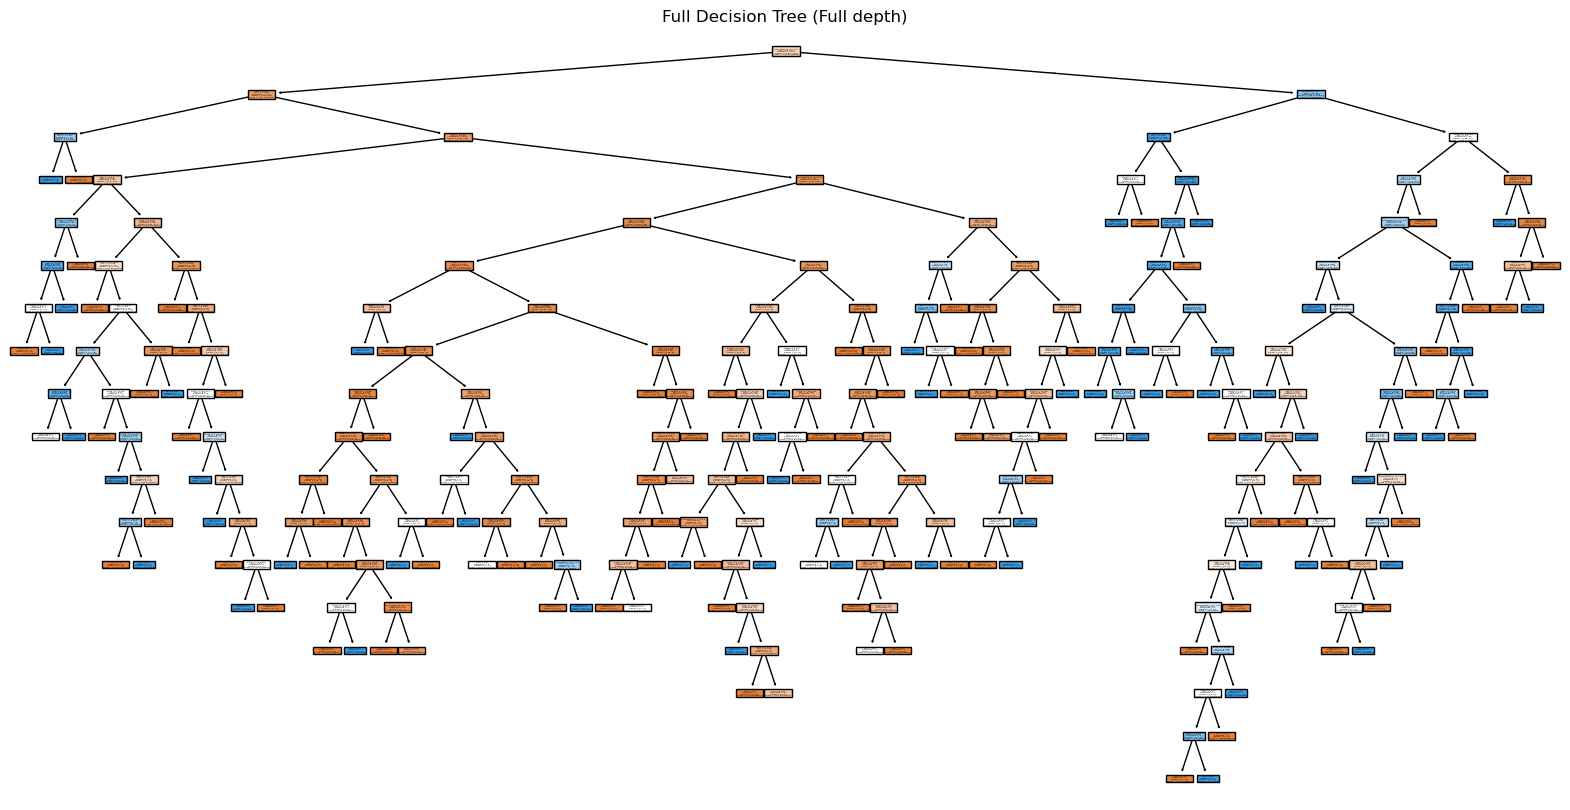

In [54]:
import matplotlib.pyplot as plt

# Plot decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title('Full Decision Tree (Full depth)')
plt.show()

In [55]:
# Compute accuracy on development set
dev_accuracy = model.score(X_dev, y_dev)
print(f"Development set accuracy: {dev_accuracy:.4f}")

Development set accuracy: 0.7809


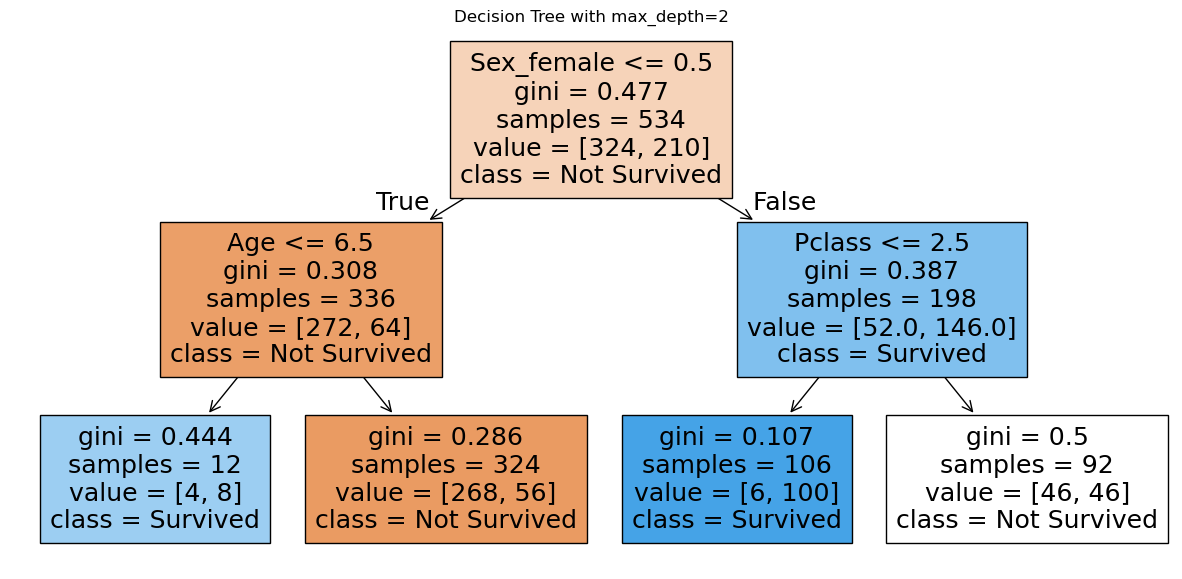

Max Depth: 2 | Training Accuracy: 0.7903 | Development Accuracy: 0.7978


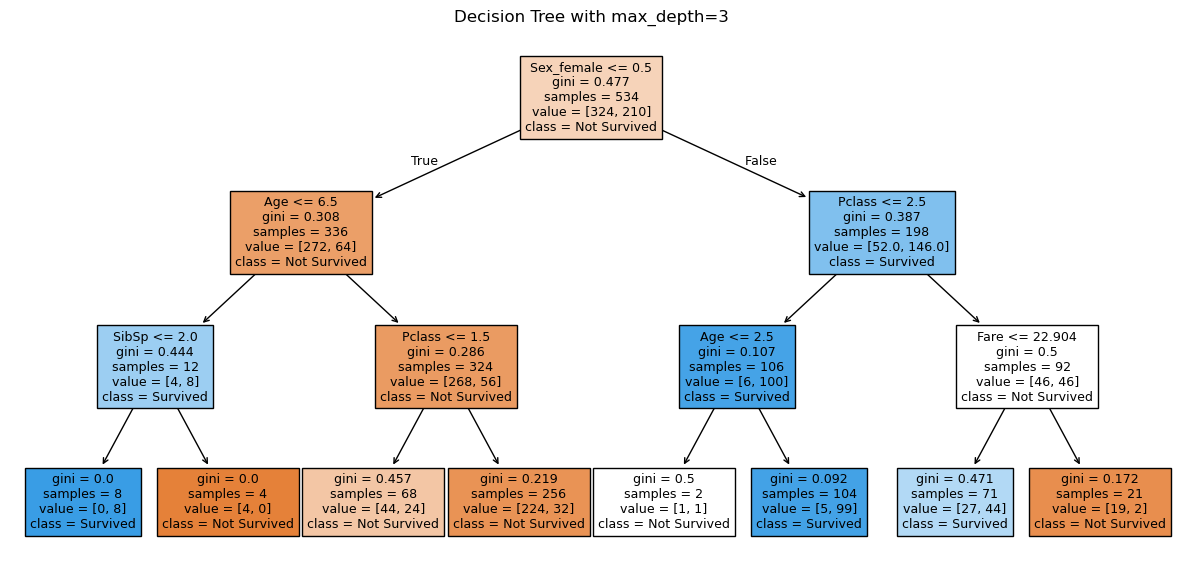

Max Depth: 3 | Training Accuracy: 0.8296 | Development Accuracy: 0.8090


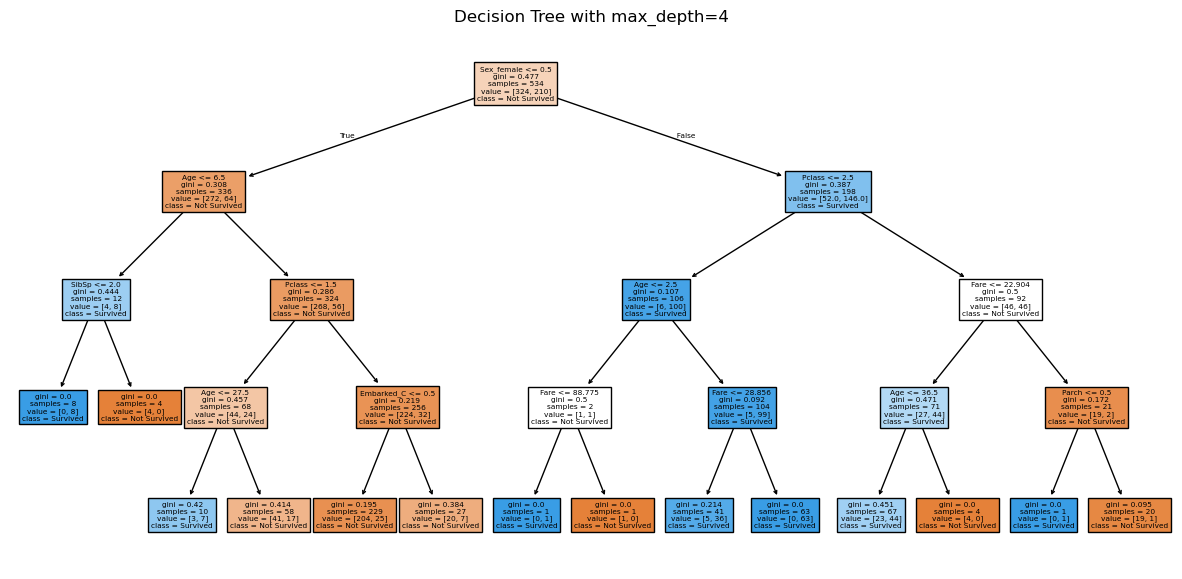

Max Depth: 4 | Training Accuracy: 0.8483 | Development Accuracy: 0.8090


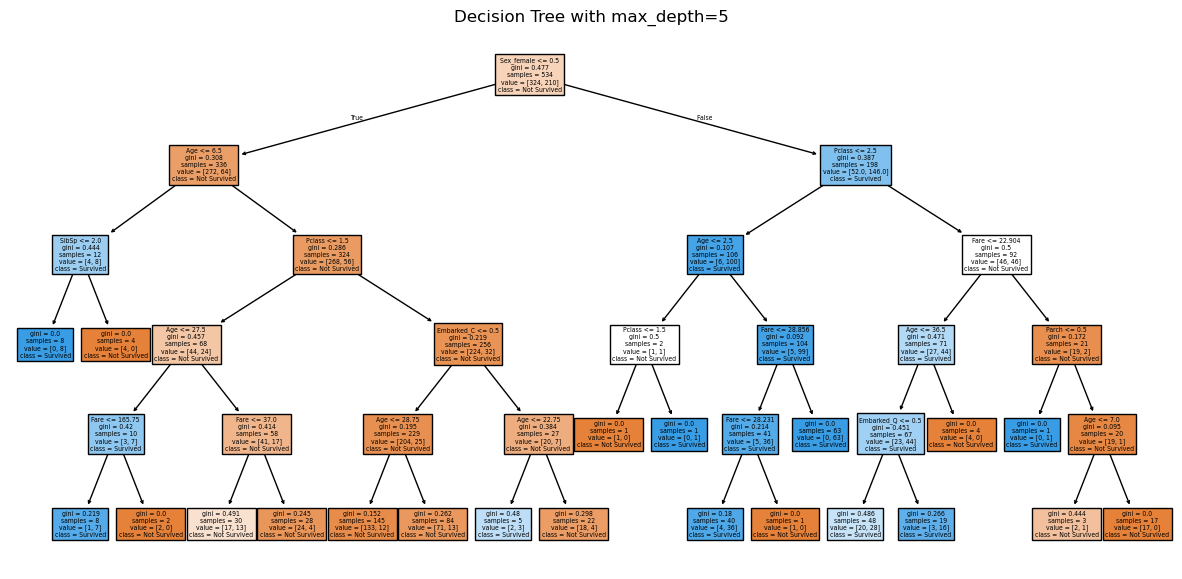

Max Depth: 5 | Training Accuracy: 0.8558 | Development Accuracy: 0.8034


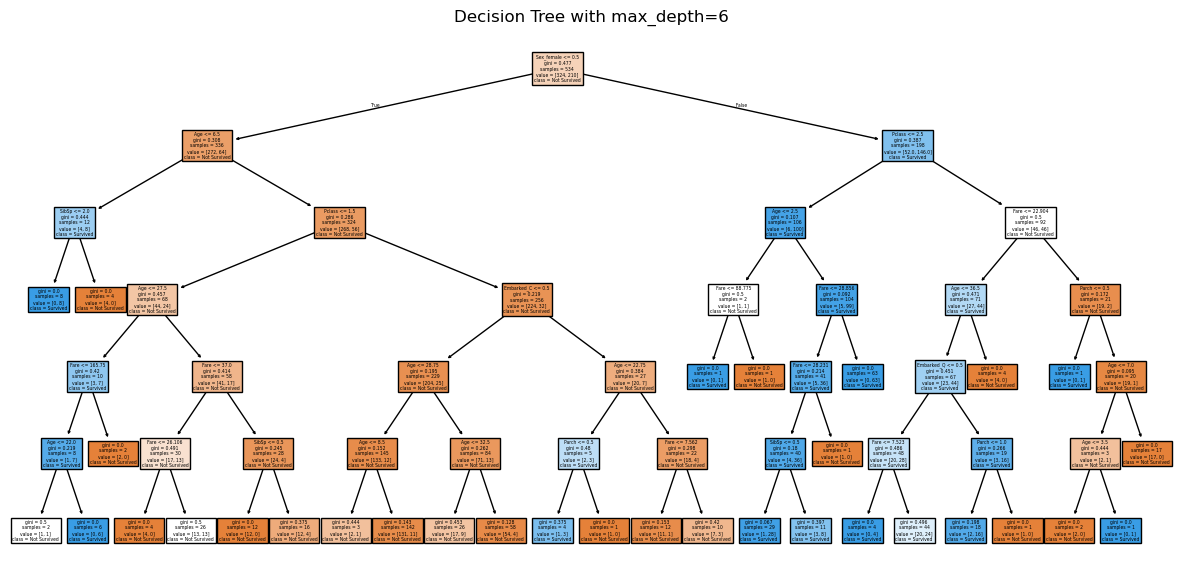

Max Depth: 6 | Training Accuracy: 0.8614 | Development Accuracy: 0.8146


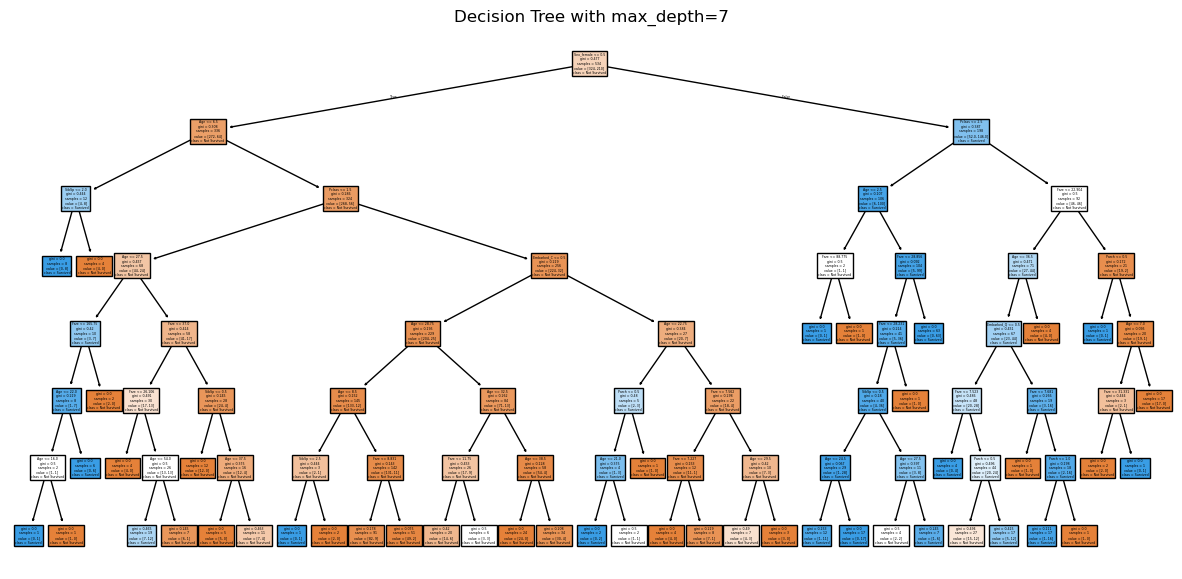

Max Depth: 7 | Training Accuracy: 0.8820 | Development Accuracy: 0.7865


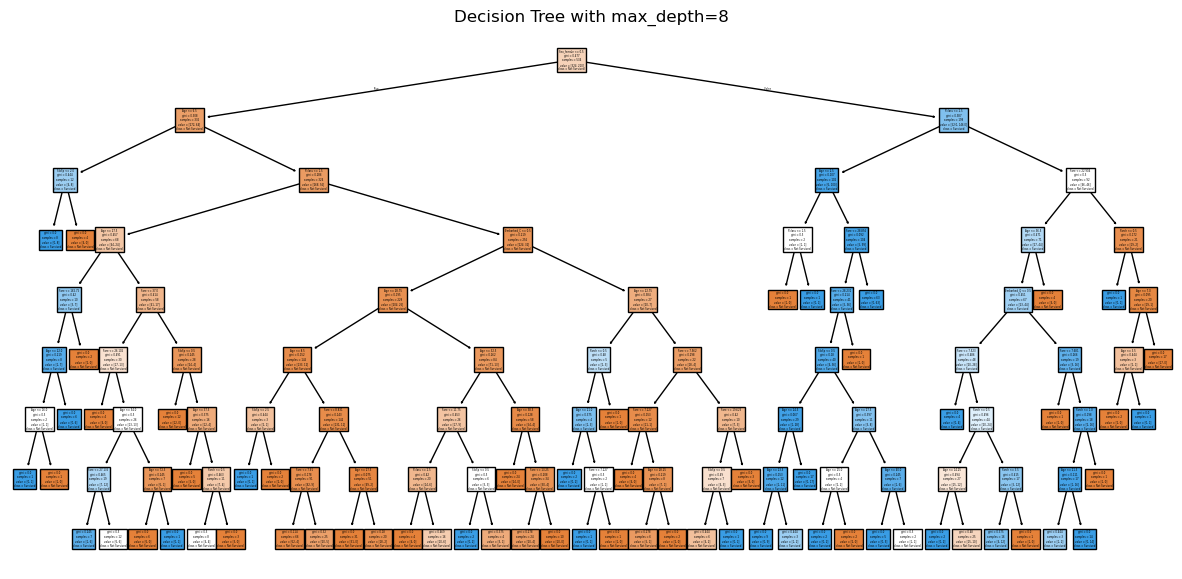

Max Depth: 8 | Training Accuracy: 0.9007 | Development Accuracy: 0.8090


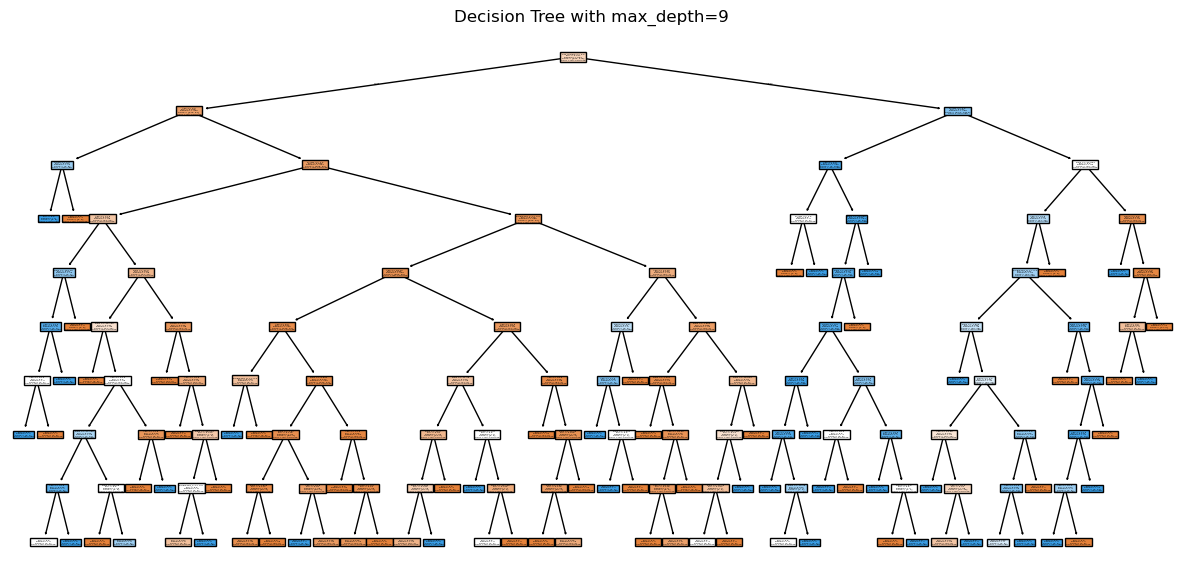

Max Depth: 9 | Training Accuracy: 0.9232 | Development Accuracy: 0.8034


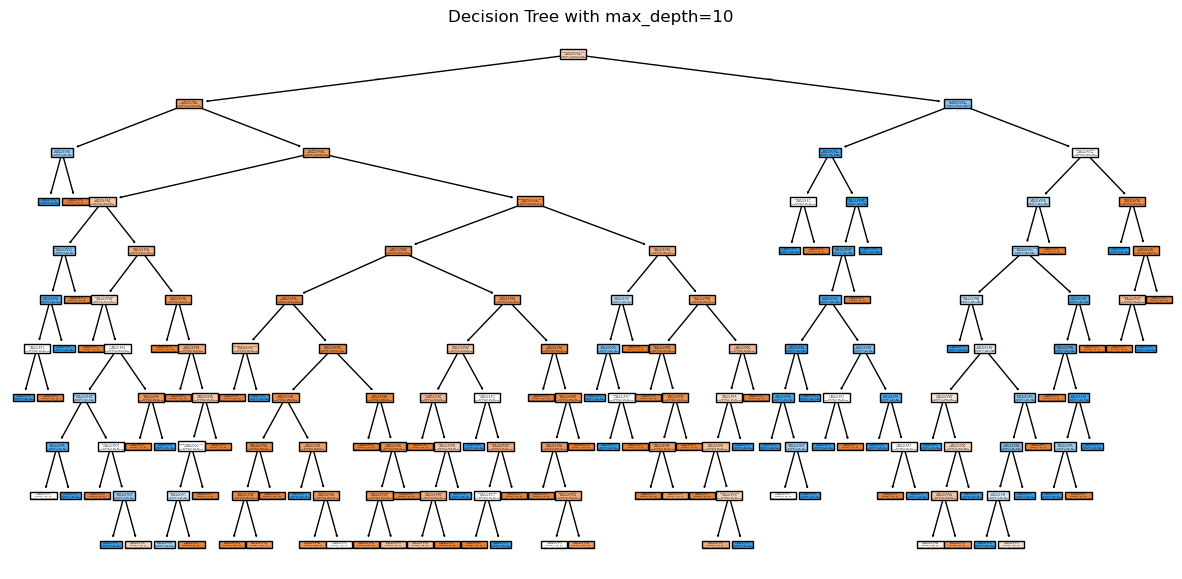

Max Depth: 10 | Training Accuracy: 0.9307 | Development Accuracy: 0.7978


In [56]:
train_accuracies = []
dev_accuracies = []

for depth in range(2, 11):
    # Train the decision tree with current max_depth
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Calculate accuracies
    train_acc = model.score(X_train, y_train)
    dev_acc = model.score(X_dev, y_dev)
    
    train_accuracies.append(train_acc)
    dev_accuracies.append(dev_acc)
    
    # Plot the tree
    plt.figure(figsize=(15, 7))
    plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
    plt.title(f"Decision Tree with max_depth={depth}")
    plt.show()
    
    print(f"Max Depth: {depth} | Training Accuracy: {train_acc:.4f} | Development Accuracy: {dev_acc:.4f}")


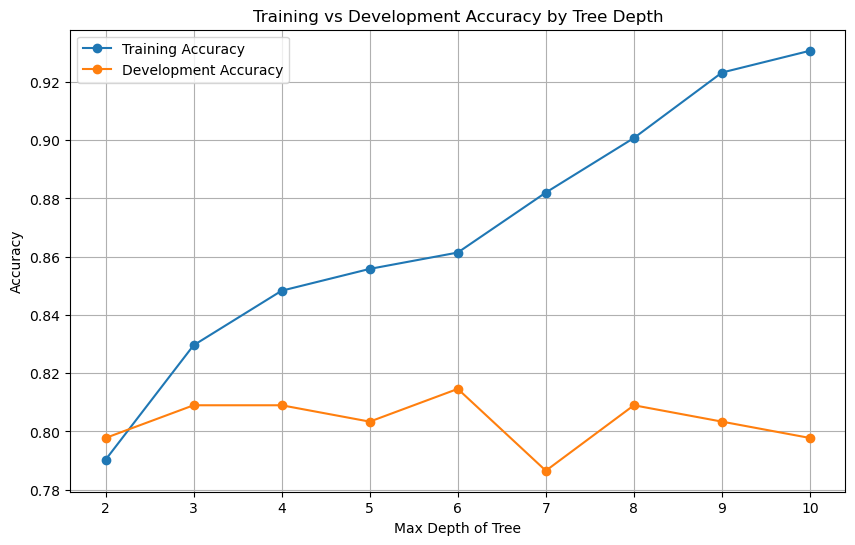

In [57]:
# Depth values
depths = list(range(2, 11))

plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label="Training Accuracy", marker='o')
plt.plot(depths, dev_accuracies, label="Development Accuracy", marker='o')

plt.xlabel("Max Depth of Tree")
plt.ylabel("Accuracy")
plt.title("Training vs Development Accuracy by Tree Depth")
plt.legend()
plt.grid(True)
plt.show()

Training Accuracy (blue line):

- The training accuracy increases steadily as the max_depth increases.

- It starts at around 0.79 at depth 2 and climbs up to over 0.92 at depth 10

This means that as the tree gets deeper it learns more details on the training data.

Development Accuracy (orange line):

- The dev accuracy rises slightly at first, peaking around depth 6, then fluctuates or drops as depth increases.

- It stays between 0.79 and 0.815.

The model gets better at generalizing up to depth 6, but after that, it doesn't perform as well on unseen data, this is a sign of overfitting.

In [58]:
# Retrain final model using best depth on the training set
final_model = DecisionTreeClassifier(max_depth=6, random_state=23)
final_model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = final_model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Final model accuracy on test data: {test_accuracy:.4f}")

Final model accuracy on test data: 0.8268


In [59]:
# Bagged tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
      n_estimators=100,random_state=23)

bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)
bag_acc = accuracy_score(y_test, y_pred_bag)
print("Bagged Tree Accuracy:", bag_acc)

Bagged Tree Accuracy: 0.8212290502793296


In [60]:
# Forest tree
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=23)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.8268156424581006


In [61]:
# Boost tree
from sklearn.ensemble import GradientBoostingClassifier

boost_model = GradientBoostingClassifier(n_estimators=100, random_state=23)
boost_model.fit(X_train, y_train)
y_pred_boost = boost_model.predict(X_test)
boost_acc = accuracy_score(y_test, y_pred_boost)
print("Boosted Tree Accuracy:", boost_acc)

Boosted Tree Accuracy: 0.8379888268156425


In [62]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easier viewing
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

      Feature  Importance
1         Age    0.244803
4        Fare    0.238188
6    Sex_male    0.149066
5  Sex_female    0.141361
0      Pclass    0.081425
2       SibSp    0.050399
3       Parch    0.046014
9  Embarked_S    0.020663
7  Embarked_C    0.017321
8  Embarked_Q    0.010761


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [3, 5, 7, None]     # Tree depth (None = full depth)
}

# Set up grid search
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Train the models
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

Best parameters: {'max_depth': 5, 'n_estimators': 50}
Best cross-validated score: 0.8259213542585082


Accuracy of Models:

- Decision Tree Accuracy: 83%

- Bagged Tree: 82%

- Boosted Tree Accuracy: 84%

- Random Forest Accuracy: 83%

Best Model: Boosted Tree (Gradient Boosting)

The Boosted Tree model (Gradient Boosting Classifier) achieved the highest test accuracy of 84%, making it the best performing model among the ones tested.

This model was trained using the following parameters:

- n_estimators = 100

- random_state = 23 (to ensure reproducibility)

- max_depth = 3 (default for GradientBoostingClassifier)